# Creating same model in [`03_pytorch_computer_vision_video.ipynb`](./03_pytorch_computer_vision_video.ipynb) using Device agnostic

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# Loading thr Dataset
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

train_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

sample_img, sample_label = train_data[0]
sample_img.shape, sample_label

(torch.Size([1, 28, 28]), 9)

In [3]:
class_names = train_data.classes
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

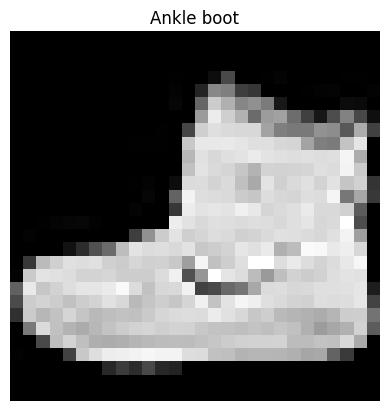

In [4]:
# Visulizing the Data
import matplotlib.pyplot as plt

plt.imshow(sample_img.squeeze(), cmap="gray")
plt.title(class_names[sample_label])
plt.axis(False)

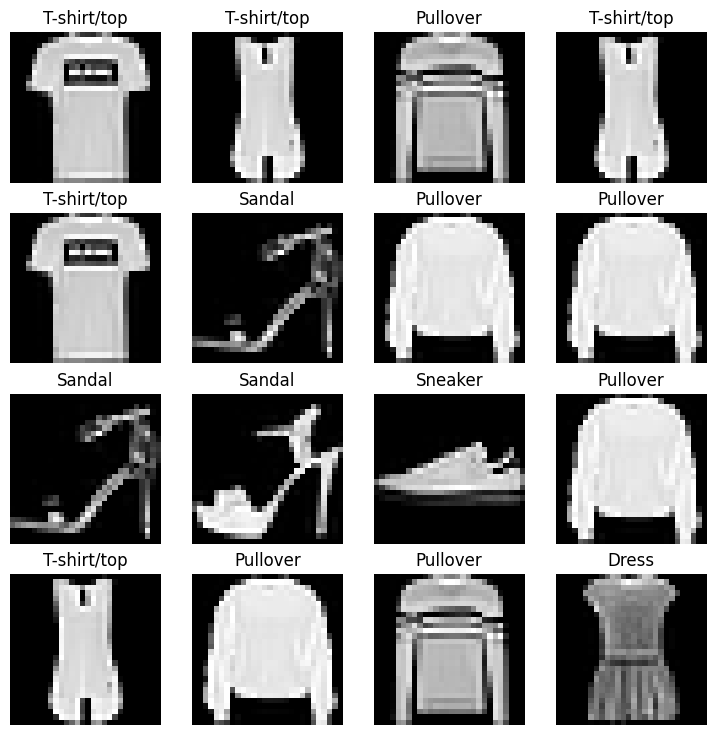

In [5]:
# plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(1, len(class_names), size=[1]).item()
    random_img, random_label = train_data[random_idx]

    fig.add_subplot(rows, cols, i)
    plt.imshow(random_img.squeeze(), cmap="gray")
    plt.title(class_names[random_label])
    plt.axis(False)

plt.show()

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fefa6ad2980>,
 <torch.utils.data.dataloader.DataLoader at 0x7fefa6ad28f0>)

In [7]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch = train_features_batch.to(device)

train_features_batch.device

device(type='cuda', index=0)

In [9]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=28*28, out_features=16),
            nn.Linear(in_features=16, out_features=len(class_names))
        )

    def forward(self, x):
        return self.layers(x)

In [10]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0().to(device)

In [22]:
# Setup loss
loss_fn = nn.CrossEntropyLoss()

# setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

# setup accuracy function

def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [23]:
enumerate(train_dataloader)

In [24]:
from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"EPOCH: {epoch} \n-------")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_train_pred = model_0(X.to(device))

        loss = loss_fn(y_train_pred, y.to(device))
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    train_loss /= len(train_data)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            y_test_pred = model_0(X_test.to(device))

            test_loss += loss_fn(y_test_pred, y_test.to(device))

            test_acc += accuracy_fn(y_test.to(device), y_test_pred.argmax(dim=1))

        # Calculate avg Test loss per batch
        test_loss /= len(test_data)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH: 0 
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0169 | Test loss: 0.0169 | Test Acc: 81.0104
EPOCH: 1 
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0154 | Test loss: 0.0157 | Test Acc: 82.2883
EPOCH: 2 
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0147 | Test loss: 0.0152 | Test Acc: 83.1270
EPOCH: 3 
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0142 | Test loss: 0.0150 | Test Acc: 82.9772
EPOCH: 4 
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked a